
# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.


# Start Coding
Let's start with our import of TensorFlow.

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

import tensorflow as tf

# The Fashion MNIST data is available directly in the tf.keras datasets API.
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

print(tf.__version__)

2.6.0


## Load Fashion MNIST data


Calling `load_data` on the imported class will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [2]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step



What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

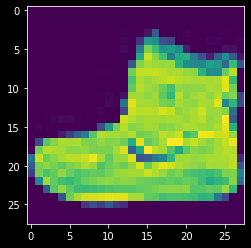

In [6]:
plt.imshow(training_images[0])
print(training_images[0])
print(training_labels[0])

## Normalize the data
You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [7]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Design the Neural Network model

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [17]:
model = Sequential([Flatten(), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax')])


`Sequential`: That defines a SEQUENCE of layers in the neural network

`Flatten`: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

`Dense`: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

`Relu` effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

`Softmax` takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

## Build and compile the model

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [25]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2797 - accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.8999
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2555 - accuracy: 0.9043
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9080
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2401 - accuracy: 0.9096
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2173 - accuracy: 0.9184
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2113 - accuracy: 0.9209
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.206

Once it's done training it shows that the accuracy is 0.9221. This tells you that your neural network is about 92% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 92% of the time. Not the best, but still quite good considering it was only trained for 10 epochs and done quite quickly (Only 42 sec).

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [26]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8831


[0.3591572940349579, 0.8830999732017517]


For me, that returned a accuracy of about .8831, which means it was about 88% accurate. As expected it probably would not do as well with unseen data as it did with data it was trained on!

# Further Explorations

## Exercise 1
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [27]:
classifications = model.predict(test_images)

print(classifications[0])

[6.5380831e-08 4.6865715e-15 2.7392718e-13 4.1235438e-14 1.2497643e-10 3.4815497e-05 6.8970851e-09 1.7442890e-03 6.6567424e-08 9.9822074e-01]


In [28]:
print(test_labels[0])

9


### E1Q1: What does this list represent?¶
1. It's 10 random meaningless values
2. It's the first 10 classifications that the computer made
3. It's the probability that this item is each of the 10 classes

Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value [https://github.com/zalandoresearch/fashion-mnist#labels](https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.


### E1Q2: How do you know that this list tells you that the item is an ankle boot?
1. There's not enough information to answer that question
2. The 10th element on the list is the biggest, and the ankle boot is labelled 9
3. The ankle boot is label 9, and there are 0->9 elements in the list

Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

## Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [31]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([Flatten(),
                                    Dense(1024, activation=tf.nn.relu),
                                    Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(training_images, training_labels, epochs=10)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1833 - accuracy: 0.9446
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0880 

### E2Q1: Increase to 1024 Neurons -- What's the impact?
1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!


## Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        thres = 0.9
        if(logs.get('accuracy') >= thres): # Experiment with changing this value
            print(f"\nReached {thres*100}% accuracy so cancelling training!")
            self.model.stop_training = True

In [38]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - accuracy: 0.8287
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3576 - accuracy: 0.8696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - accuracy: 0.8817
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8958
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2659 - accuracy: 0.9006

Reached 90.0% accuracy so cancelling training!
